In [2]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql.types import *
from pyspark.sql.functions import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [7]:
# 0. load data
import pandas as pd
import matplotlib.pyplot as plt
sherlock = pd.read_csv('ArchivosNOTOCAR/kk.csv')
sherlock = sherlock.fillna("0")
head = sherlock.head(1)

In [4]:
label = pd.read_csv('ArchivosNOTOCAR/fichero.txt')


In [5]:
X = sherlock[["5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"]]
y = label['label']
head2 = label.head(1)

In [8]:
sherlock

1              2        5        6        7        8        9  \
0         23  1480448347538  60.7143       72  72.4138  76.9231  70.5128   
1         58  1480448352552  79.1667  33.3333  48.1481       36   49.162   
2         25  1480448357601  48.1481        0       36  53.5714  34.4299   
3         52  1480448362652        5  8.33333  13.0435  9.52381  8.97516   
4         20  1480448367653  58.3333        0  41.6667  28.5714  32.1429   
5         19  1480448372774  39.2857      100  28.5714  29.6296  49.3717   
6         28  1480448377739  39.1304       28       25     37.5  32.4076   
7         35  1480448382794       25        0  17.3913   26.087  17.1196   
8         26  1480448387868   4.7619  4.16667  4.16667  13.0435  6.53468   
9         40  1480448392893  34.2857      100  42.3077  15.3846  47.9945   
10        54  1480448398004  76.9231  9.52381  34.6154  53.8462  43.7271   
11        72  1480448403036  29.0323    18.75       15  26.9231  22.4263   
12        77  1480448408066       20  26.3158     12.5  26.9231  21.4347   
13        95  1480448413105  10.7143  91.6667  16.6667       20  34.7619   
14        90  1480448418236  29.1667       50  83.3333  11.5385  43.5096   
15         4  1480448423111  4.34783        0  9.09091  8.69565   5.5336   
16         6  1480448428210  48.2759  17.6471       32  44.4444  35.5918   
17        53  1480448433205  28.5714        0  10.7143       36  18.8214   
18        16  1480448438251  8.33333     6.25        5  4.54545   6.0322   
19        21  1480448443271       56  51.7241  29.6296  32.1429  42.3742   
20        14  1480448451463  86.9565  86.9565       76   62.963    78219   
21        46  1480448455910        0  41.6667  8.33333  4.34783   13.587   
22        12  1480448461032  65.2174        0  20.8333  61.5385  36.8973   
23        15  1480448466118  34.7826  91.3043       25  13.0435  41.0326   
24        60  1480448471414  14.2857  86.9565     37.5  14.2857   38.257   
25         7  1480448476272  36.6667        0  8.33333     6.25  12.8125   
26         8  1480448481470  86.9565       44  42.3077  4.16667  44.3577   
27        24  1480448486621       75        0       25       10     27.5   
28        32  1480448491709       50        0  21.4286   62.963  33.5979   
29         9  1480448496871     12.5        0  4.54545  8.33333   6.3447   
...      ...            ...      ...      ...      ...      ...      ...   
79902  79929  1481025818431     37.5       25       20  58.3333  35.2083   
79903  79893  1481025825395       88      100      100      100       97   
79904  79917  1481025830332  95.6522  4.34783        0  16.6667  29.1667   
79905  79870  1481025836875       96      100       88       96       95   
79906  79891  1481025841729  33.3333        0  9.09091  22.2222  16.1616   
79907  79875  1481025846804  34.7826  81.4815       48      100   66.066   
79908  79865  1481025851852  25.9259  7.69231  11.1111  27.5862  18.0789   
79909  79874  1481025856874  48.1481      100  28.5714  42.8571  54.8942   
79910  79876  1481025861901  29.6296        0  5.26316       12  11.7232   
79911  79914  1481025912551  77.7778   62.963  44.8276  77.2727  65.7103   
79912  79889  1481025917686  60.7143  17.8571  46.1538  35.7143  40.1099   
79913  79896  1481025922573  91.6667       64  65.3846     62.5  70.8878   
79914  79927  1481025927571  47.8261        0       64   37.931  37.4393   
79915  79911  1481025932622  19.0476       25  27.2727       36  26.8301   
79916  79913  1481025937714       50  9.52381      100       48  51.8809   
79917  79925  1481026388690  26.6667      100     37.5  45.4545  52.4053   
79918  79916  1481026393901  39.1304      100  59.0909     62.5  65.1803   
79919  79877  1481026398932     37.5  10.5263       16       16  20.0066   
79920  79859  1481026404108  92.3077  96.1539  92.3077      100  95.1923   
79921  79903  1481026409084   37.037       35       36  28.5714  34.1521   
79922  79881  1481026515353  8.69565        0        0     

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [6]:
regressor = RandomForestRegressor(n_estimators= 4, max_depth = 2, criterion='mae', random_state=0)

In [7]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print "Error Measure ", mae



Error Measure  0.00041441216026


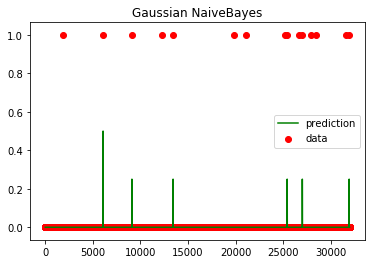

In [10]:
import numpy as np
xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Gaussian NaiveBayes")
plt.show()

In [11]:
features = sherlock["5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"]


print 'Feature Relevancies'
list1 = zip(features, regressor.feature_importances_)
from tabulate import tabulate
print tabulate(list1, headers=['Feature', 'Relevance'])

Feature Relevancies
  Feature    Relevance
---------  -----------
        1  0
        2  0
        5  2.31296e-18
        6  0
        7  0.125
        8  0
        9  0
       10  0.125
       11  0
       12  0
       13  0
       14  0
       15  0
       16  1.85037e-16
       17  0
       18  0.5
       19  0
       20  0.25
       21  0
       22  1.77636e-16
       23  0
